# Star Classification Using Machine Learning


Build a machine learning model that predicts the **Spectral Class** of stars based on astrophysical features.

### **Dataset**
- Features: temperature, luminosity, radius, star color, etc.
- Target variable: **Spectral Class** (categorical)
 


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import (
    train_test_split, 
    cross_val_score,
    StratifiedKFold,
    GridSearchCV
    )
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report
)

from sklearn.pipeline import Pipeline

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB


##  Load Dataset


In [3]:
data = pd.read_csv("6 class csv.csv")
data.head()


,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


##  Basic Data Inspection


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.3+ KB


In [5]:
data['Spectral Class'].unique()

array(['M', 'B', 'A', 'F', 'O', 'K', 'G'], dtype=object)

In [6]:
data['Star color'].unique()

array(['Red', 'Blue White', 'White', 'Yellowish White', 'Blue white',
       'Pale yellow orange', 'Blue', 'Blue-white', 'Whitish',
       'yellow-white', 'Orange', 'White-Yellow', 'white', 'Blue ',
       'yellowish', 'Yellowish', 'Orange-Red', 'Blue white ',
       'Blue-White'], dtype=object)

In [7]:
data.describe()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


In [8]:
data.isna().sum()

Temperature (K)           0
Luminosity(L/Lo)          0
Radius(R/Ro)              0
Absolute magnitude(Mv)    0
Star type                 0
Star color                0
Spectral Class            0
dtype: int64

## Encode Categorical Columns



In [9]:
# Encode all categorical columns automatically
le = LabelEncoder()

for col in data.select_dtypes(include=['object']).columns:
    data[col] = le.fit_transform(data[col])

data.head()


,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,10,5
1,3042,0.000500,0.1542,16.60,0,10,5
2,2600,0.000300,0.1020,18.70,0,10,5
3,2800,0.000200,0.1600,16.65,0,10,5
4,1939,0.000138,0.1030,20.06,0,10,5


## Exploratory Data Analysis (EDA)
 

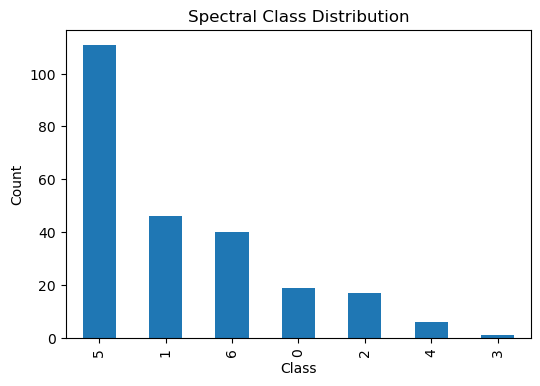

In [10]:
data['Spectral Class'].value_counts().plot(kind='bar', figsize=(6,4),
                                           title="Spectral Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

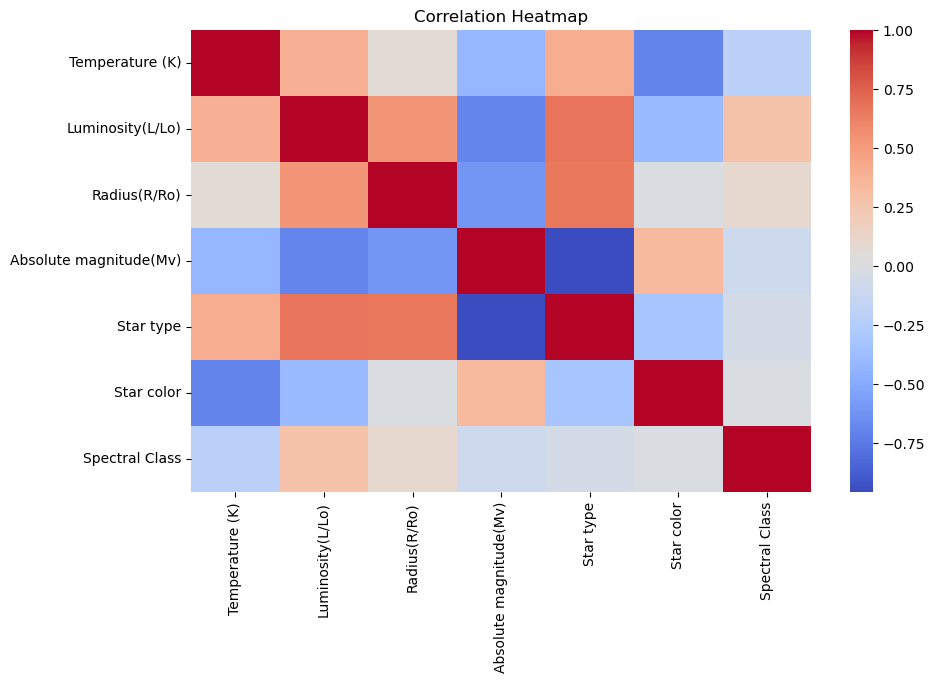

In [11]:
plt.figure(figsize=(10, 6))
numeric_data = data.select_dtypes(include=[np.number])
sns.heatmap(numeric_data.corr(), cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


## Feature / Target Split


In [12]:
X = data.drop("Spectral Class", axis=1)
y = data["Spectral Class"]

X

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color
0,3068,0.002400,0.1700,16.12,0,10
1,3042,0.000500,0.1542,16.60,0,10
2,2600,0.000300,0.1020,18.70,0,10
3,2800,0.000200,0.1600,16.65,0,10
4,1939,0.000138,0.1030,20.06,0,10
...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,0
236,30839,834042.000000,1194.0000,-10.63,5,0
237,8829,537493.000000,1423.0000,-10.73,5,11
238,9235,404940.000000,1112.0000,-11.23,5,11


## Train/Test Split & Feature Scalling

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=100
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_train.shape


(180,)

## Train Models

In [14]:
models = {
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": GaussianNB()
}

acc_results = {}
y_pred_results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_results[name] = y_pred
    acc = accuracy_score(y_test, y_pred)
    acc_results[name] = acc
    print(f"{name} Accuracy: {acc:.3f}")


KNN Accuracy: 0.817
Random Forest Accuracy: 0.950
SVM Accuracy: 0.817
Logistic Regression Accuracy: 0.850
Naive Bayes Accuracy: 0.917


## Confusion Matrices
 


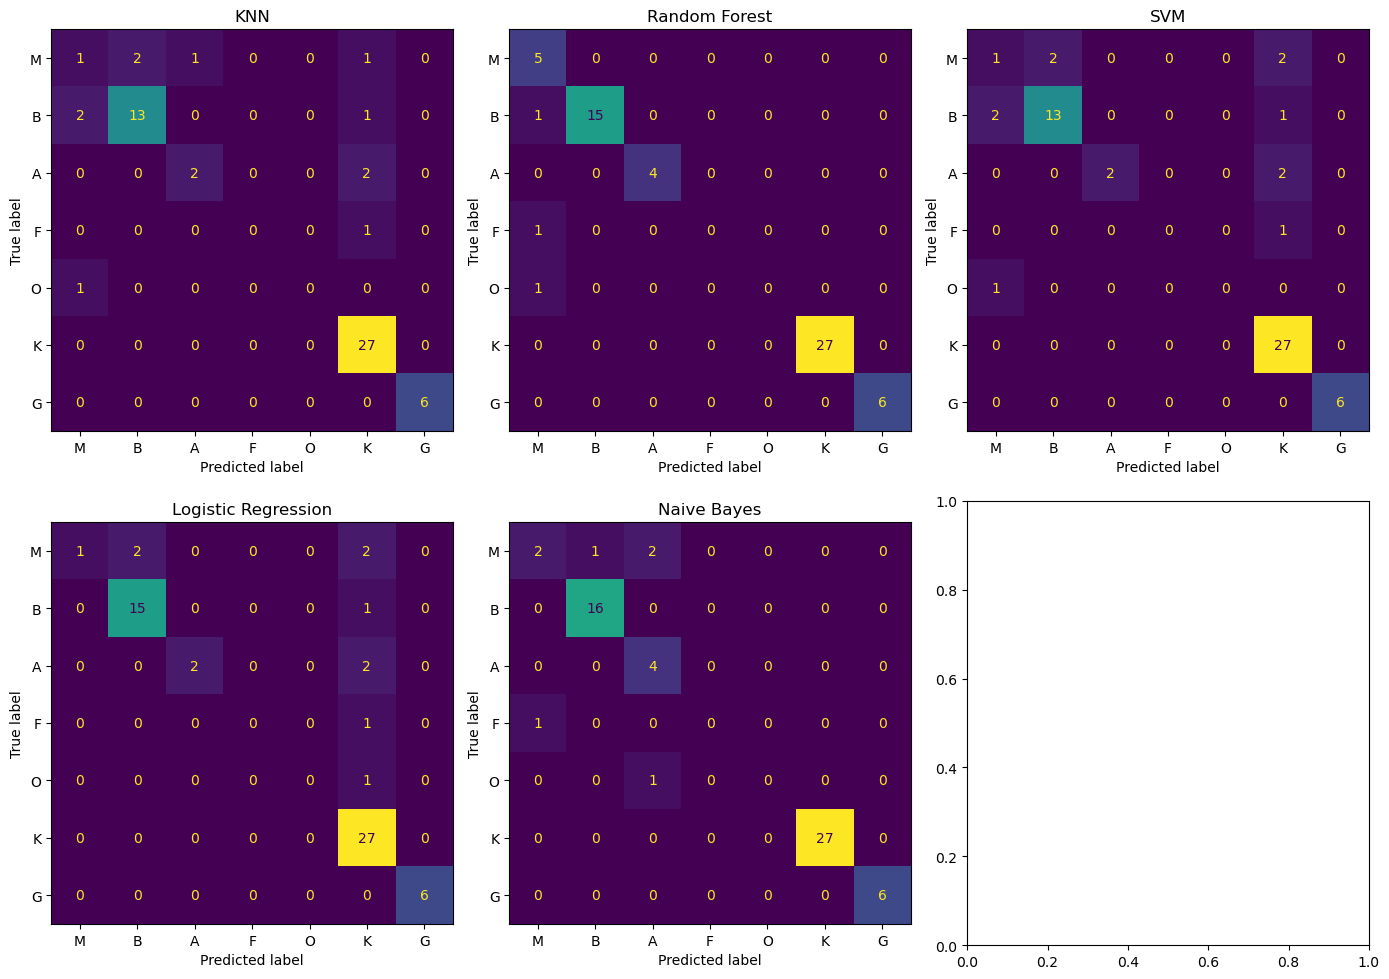

In [15]:
fig, axes = plt.subplots(2, 3, figsize=(14, 10))
axes = axes.flatten()

for ax, (name, preds) in zip(axes, y_pred_results.items()):
    cm = confusion_matrix(y_test, preds)
    disp = ConfusionMatrixDisplay(cm, display_labels=['M', 'B', 'A', 'F', 'O', 'K', 'G'])
    disp.plot(ax=ax, colorbar=False)
    ax.set_title(name)

plt.tight_layout()
plt.show()

    

## Cross-validation


In [16]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = {}

for name, model in models.items():

    if name in ["KNN", "SVM", "Logistic Regression"]:
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('classifier', model)
        ])
    else:
        pipeline = Pipeline([
            ('classifier', model)
        ])

    scores = cross_val_score(pipeline, X_train, y_train, cv=skf, scoring='accuracy')
    cv_scores[name] = scores

    print(f"{name}: {scores.mean():.3f} ± {scores.std():.3f}")

KNN: 0.878 ± 0.042
Random Forest: 0.911 ± 0.048
SVM: 0.883 ± 0.048
Logistic Regression: 0.883 ± 0.011
Naive Bayes: 0.833 ± 0.063


## Hyperparameter tuning

In [17]:
# Define parameter grids for tuning
param_grids = {
    "KNN": {
        'classifier__n_neighbors': [3, 5, 7, 9],
        'classifier__weights': ['uniform', 'distance']
    },
    "SVM": {
        'classifier__C': [0.1, 1, 10],
        'classifier__kernel': ['linear', 'rbf'],
        'classifier__gamma': ['scale', 'auto']
    },
    "Logistic Regression": {
        'classifier__C': [0.1, 1, 10],
        'classifier__solver': ['lbfgs', 'liblinear']
    },
    "Random Forest": {
        'classifier__n_estimators': [50, 100, 150],
        'classifier__max_depth': [None, 3, 5]
    },
    "Naive Bayes": {}  # no hyperparameters to tune
}

best_estimators = {}

for name, model in models.items():

    if name in ["KNN", "SVM", "Logistic Regression"]:
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('classifier', model)
        ])
    else:
        pipeline = Pipeline([
            ('classifier', model)
        ])

    grid = GridSearchCV(pipeline, param_grids[name], cv=skf, scoring='accuracy')
    grid.fit(X_train, y_train)

    best_estimators[name] = grid.best_estimator_

    print(f"{name} - Best Params: {grid.best_params_ if param_grids[name] else 'default'}")
    print(f"{name} - Best CV Accuracy after Tuning: {grid.best_score_:.4f}")

KNN - Best Params: {'classifier__n_neighbors': 5, 'classifier__weights': 'distance'}
KNN - Best CV Accuracy after Tuning: 0.9000
Random Forest - Best Params: {'classifier__max_depth': None, 'classifier__n_estimators': 100}
Random Forest - Best CV Accuracy after Tuning: 0.9222
SVM - Best Params: {'classifier__C': 1, 'classifier__gamma': 'scale', 'classifier__kernel': 'linear'}
SVM - Best CV Accuracy after Tuning: 0.9111
Logistic Regression - Best Params: {'classifier__C': 10, 'classifier__solver': 'lbfgs'}
Logistic Regression - Best CV Accuracy after Tuning: 0.8944
Naive Bayes - Best Params: default
Naive Bayes - Best CV Accuracy after Tuning: 0.8333


## Final test evaluation

In [18]:
best_model_name = None
best_model_acc = 0
best_model_estimator = None

for name, estimator in best_estimators.items():
    y_pred = estimator.predict(X_test)
    test_acc = accuracy_score(y_test, y_pred)
    print(f"{name} - Test Accuracy (Tuned): {test_acc:.4f}")

    if test_acc > best_model_acc:
        best_model_acc = test_acc
        best_model_name = name
        best_model_estimator = estimator

print(f"\nBest Model: {best_model_name} with Test Accuracy: {best_model_acc:.4f}")

KNN - Test Accuracy (Tuned): 0.8833
Random Forest - Test Accuracy (Tuned): 0.9500
SVM - Test Accuracy (Tuned): 0.8500
Logistic Regression - Test Accuracy (Tuned): 0.8833
Naive Bayes - Test Accuracy (Tuned): 0.9167

Best Model: Random Forest with Test Accuracy: 0.9500


### Confusion matrix for the best model

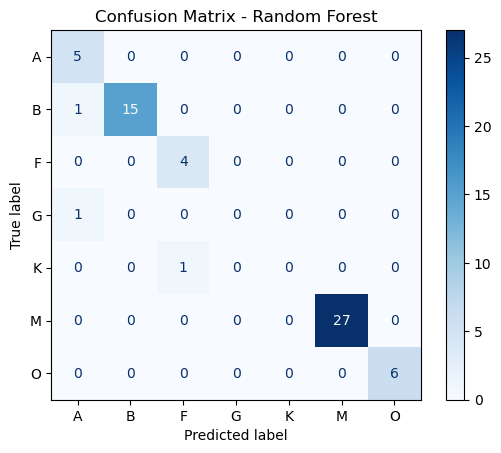

In [19]:
y_pred_best = best_model_estimator.predict(X_test)
cm = confusion_matrix(y_test, y_pred_best)
disp = ConfusionMatrixDisplay(cm, display_labels=le.classes_)
disp.plot(cmap='Blues')
plt.title(f"Confusion Matrix - {best_model_name}")
plt.show()

### Classification report

In [20]:
print(f"\nClassification Report - {best_model_name}:\n")
print(classification_report(y_test, y_pred_best, zero_division=1))



Classification Report - Random Forest:

              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       1.00      0.94      0.97        16
           2       0.80      1.00      0.89         4
           3       1.00      0.00      0.00         1
           4       1.00      0.00      0.00         1
           5       1.00      1.00      1.00        27
           6       1.00      1.00      1.00         6

    accuracy                           0.95        60
   macro avg       0.93      0.71      0.67        60
weighted avg       0.96      0.95      0.94        60



In [21]:

print(f"\nClassification Report - {best_model_name}:\n")
print(classification_report(y_test, y_pred_best, target_names=le.classes_, zero_division=1))


Classification Report - Random Forest:

              precision    recall  f1-score   support

           A       0.71      1.00      0.83         5
           B       1.00      0.94      0.97        16
           F       0.80      1.00      0.89         4
           G       1.00      0.00      0.00         1
           K       1.00      0.00      0.00         1
           M       1.00      1.00      1.00        27
           O       1.00      1.00      1.00         6

    accuracy                           0.95        60
   macro avg       0.93      0.71      0.67        60
weighted avg       0.96      0.95      0.94        60

